# 2 Exercise

## 2.1 Univariate regression on analytical functions

### 2.1.1-2.1.2 Create initial dataset and draw / inspect the shape of all 3 functions.

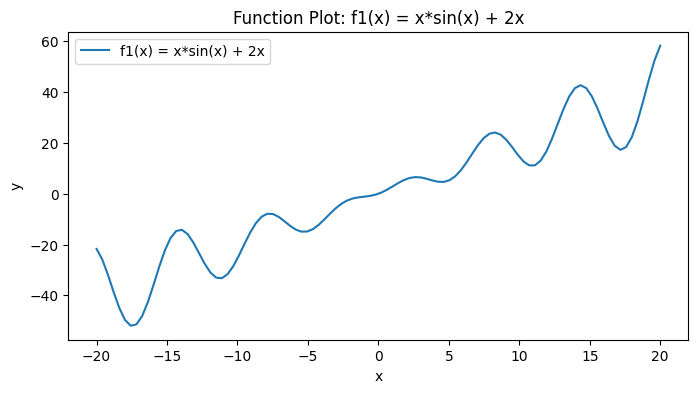

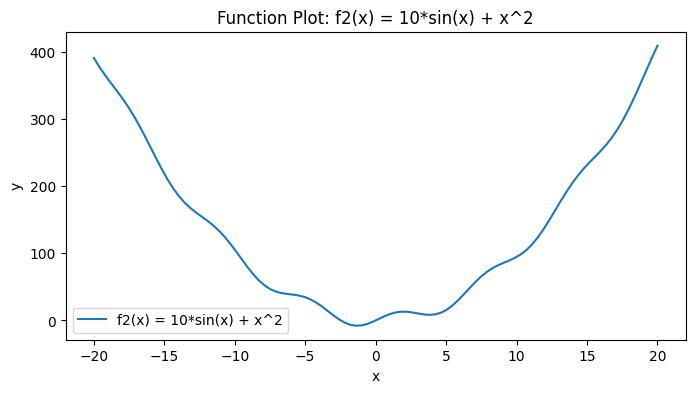

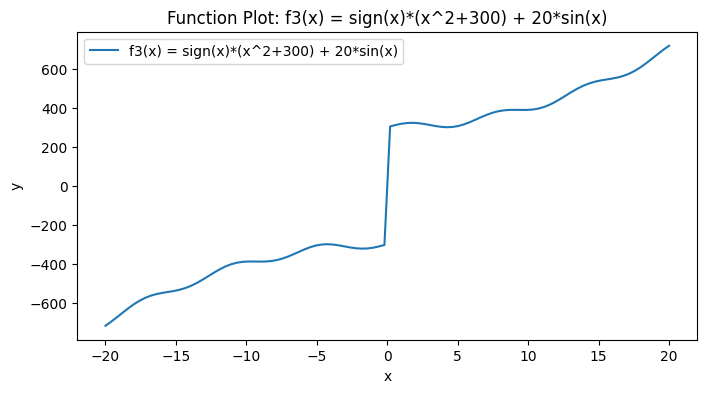

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# using the first function
def f1(x):
    return x * np.sin(x) + 2 * x

def f2(x):
    return 10 * np.sin(x) + x**2

def f3(x):
    return np.sign(x) * (x**2 + 300) + 20 * np.sin(x)

functions = [f1, f2, f3]
fnames = ["f1(x) = x*sin(x) + 2x",
          "f2(x) = 10*sin(x) + x^2",
          "f3(x) = sign(x)*(x^2+300) + 20*sin(x)"]

tr = 20
n_samples = 100
X = np.linspace(-tr, tr, n_samples)


# draw the plot
for idx, f in enumerate(functions):
    y = f(X)
    plt.figure(figsize=(8,4))
    plt.plot(X, y, label=fnames[idx])
    plt.title(f"Function Plot: {fnames[idx]}")
    plt.xlabel("x"); plt.ylabel("y")
    plt.legend()
    plt.show()


*   **f1(x) = x*sin(x) + 2x**

Looking at the plot, we can see a wavy pattern on top of a linearly increasing trend. Simple linear regression cannot fit the part well. A polynomial regression with higher degree or a neural network regressor such as MLPRegressor can fit this curve better. Random Forest Regressor is also a good choice for capturing nonlinear relationships, though it may not be as smooth. Overall, MLPRegressor and Polynomial Regression would likely perform better for this function f1.

*   **f2(x) = 10*sin(x) + x²**

This function mainly resembles a quadratic curve with mild sinusoidal oscillations. Polynomial regression should fit the curve well, while linear regression will not capture the parabolic growth.

*   **f3(x) = sign(x)(x²+300) + 20sin(x)**

This function has a sharp discontinuity at x=0 and is highly nonlinear, combining piecewise quadratic shapes and oscillations. Nonlinear models such as Random Forest or neural networks might perform better, while polynomial regression could struggle with the discontinuity.

### 2.1.3

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


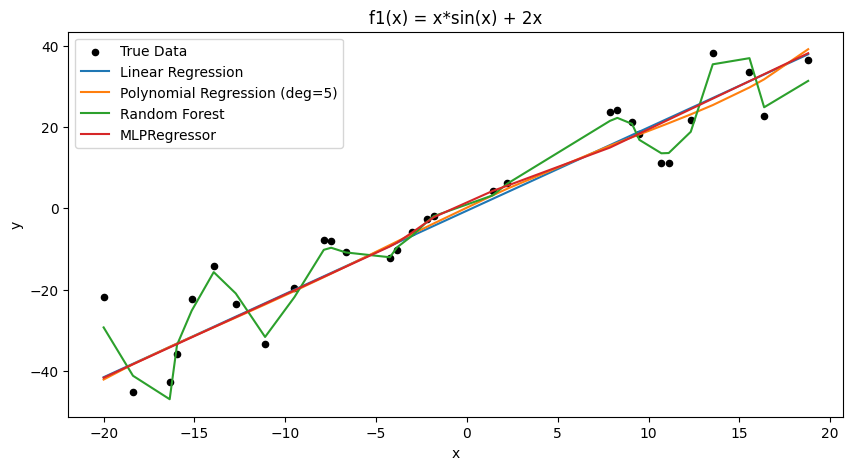

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


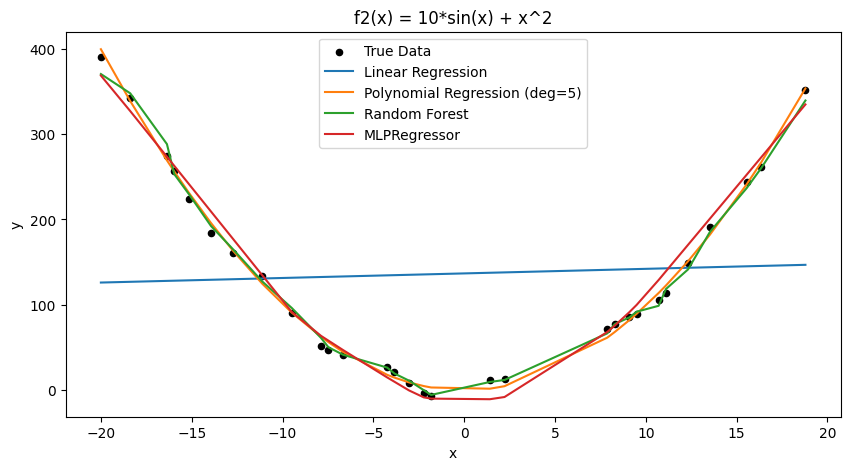

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


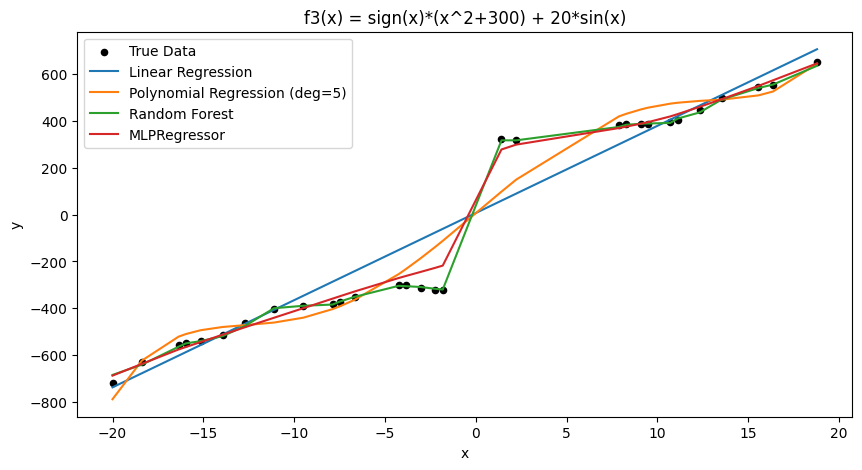

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor


all_results = []


for idx, f in enumerate(functions):
    y = f(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.7, random_state=42, shuffle=True
    )
    y_test = y_test[X_test.argsort()]
    X_test = np.sort(X_test)


    # （1）Linear Regression
    linreg = LinearRegression()
    linreg.fit(X_train.reshape(-1, 1), y_train)
    y_pred_lin = linreg.predict(X_test.reshape(-1, 1))

    # （2）Polynomial Regression（degree 5）
    poly = PolynomialFeatures(degree=5)
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_test_poly = poly.transform(X_test.reshape(-1, 1))
    linreg_poly = LinearRegression()
    linreg_poly.fit(X_train_poly, y_train)
    y_pred_poly = linreg_poly.predict(X_test_poly)

    # （3）Random Forest Regressor
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train.reshape(-1, 1), y_train)
    y_pred_rf = rf.predict(X_test.reshape(-1, 1))

    # （4）MLP Regressor
    mlp = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
    mlp.fit(X_train.reshape(-1, 1), y_train)
    y_pred_mlp = mlp.predict(X_test.reshape(-1, 1))

    # Sort and align all tests and predictions
    sort_idx = np.argsort(X_test)
    X_test_sorted = X_test[sort_idx]
    y_test_sorted = y_test[sort_idx]
    y_pred_lin_sorted = y_pred_lin[sort_idx]
    y_pred_poly_sorted = y_pred_poly[sort_idx]
    y_pred_rf_sorted = y_pred_rf[sort_idx]
    y_pred_mlp_sorted = y_pred_mlp[sort_idx]

    all_results.append({
        "fname": fnames[idx],
        "y_test": y_test_sorted,
        "y_pred_lin": y_pred_lin_sorted,
        "y_pred_poly": y_pred_poly_sorted,
        "y_pred_rf": y_pred_rf_sorted,
        "y_pred_mlp": y_pred_mlp_sorted
    })

    # draw
    plt.figure(figsize=(10, 5))
    plt.scatter(X_test_sorted, y_test_sorted, color='black', label='True Data', s=20)
    plt.plot(X_test_sorted, y_pred_lin_sorted, label='Linear Regression')
    plt.plot(X_test_sorted, y_pred_poly_sorted, label='Polynomial Regression (deg=5)')
    plt.plot(X_test_sorted, y_pred_rf_sorted, label='Random Forest')
    plt.plot(X_test_sorted, y_pred_mlp_sorted, label='MLPRegressor')
    plt.legend()
    plt.title(f"{fnames[idx]}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()


### 2.1.4 Evaluate regression outcome

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

for result in all_results:
    y_test = result["y_test"]
    y_pred_lin = result["y_pred_lin"]
    y_pred_poly = result["y_pred_poly"]
    y_pred_rf = result["y_pred_rf"]
    y_pred_mlp = result["y_pred_mlp"]
    fname = result["fname"]

    print(f"\n--- Metrics for {fname} ---")
    metrics = {
        'Linear Regression': (mean_squared_error(y_test, y_pred_lin), r2_score(y_test, y_pred_lin)),
        'Polynomial Regression': (mean_squared_error(y_test, y_pred_poly), r2_score(y_test, y_pred_poly)),
        'Random Forest': (mean_squared_error(y_test, y_pred_rf), r2_score(y_test, y_pred_rf)),
        'MLPRegressor': (mean_squared_error(y_test, y_pred_mlp), r2_score(y_test, y_pred_mlp))
    }
    for model, (mse, r2) in metrics.items():
        print(f"{model}: MSE={mse:.2f}, R2={r2:.2f}")


--- Metrics for f1(x) = x*sin(x) + 2x ---
Linear Regression: MSE=57.42, R2=0.89
Polynomial Regression: MSE=57.82, R2=0.89
Random Forest: MSE=7.01, R2=0.99
MLPRegressor: MSE=57.44, R2=0.89

--- Metrics for f2(x) = 10*sin(x) + x^2 ---
Linear Regression: MSE=12926.81, R2=-0.02
Polynomial Regression: MSE=51.66, R2=1.00
Random Forest: MSE=46.31, R2=1.00
MLPRegressor: MSE=201.75, R2=0.98

--- Metrics for f3(x) = sign(x)*(x^2+300) + 20*sin(x) ---
Linear Regression: MSE=13568.76, R2=0.93
Polynomial Regression: MSE=7508.53, R2=0.96
Random Forest: MSE=71.59, R2=1.00
MLPRegressor: MSE=1216.94, R2=0.99


**Result analysis and interpretation**

* f1(x) = x·sin(x) + 2x


Linear regression and polynomial regression perform similarly, with high MSE and R² around 0.89, indicating that they mainly capture linear trends and have limited fit to high-frequency oscillations.

Random Forest MSE drops significantly and R² increases significantly, indicating that it is better at fitting complex functions of periodic + linear mixtures.

MLP is similar to linear/polynomial regression, and it may be that the network parameters need to be further tuned or the number of samples is limited.


* f2(x) = 10·sin(x) + x²

Linear regression MSE is extremely high, R² is negative, and the fitting effect is extremely poor (because the function is a quadratic trend as a whole, which is difficult to cover with a linear model).

Polynomial regression and Random Forest MSE are extremely low, R²=1.00, which is almost a perfect fit, because the fifth-order polynomial or tree model can easily capture quadratic trends and small oscillations.

MLP also performs very well, with R² close to 1.


* f3(x) = sign(x)(x²+300) + 20sin(x)

Linear regression performs OK, with R²=0.93, but still significantly inferior to more complex models.

Polynomial regression and MLP perform well, and Random Forest again achieves a near-perfect fit (minimal MSE, R²=1.00).

### 2.1.5 Introducing new features


===== f1(x) = x*sin(x) + 2x =====


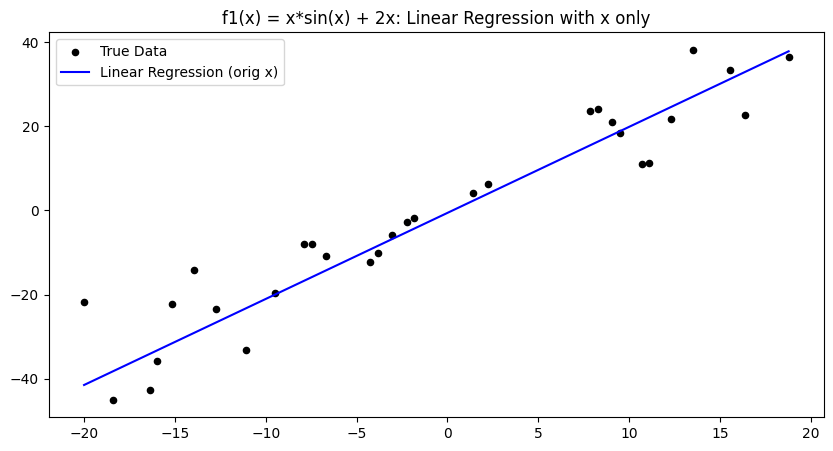

Linear Regression (x only): MSE=57.42, R2=0.89


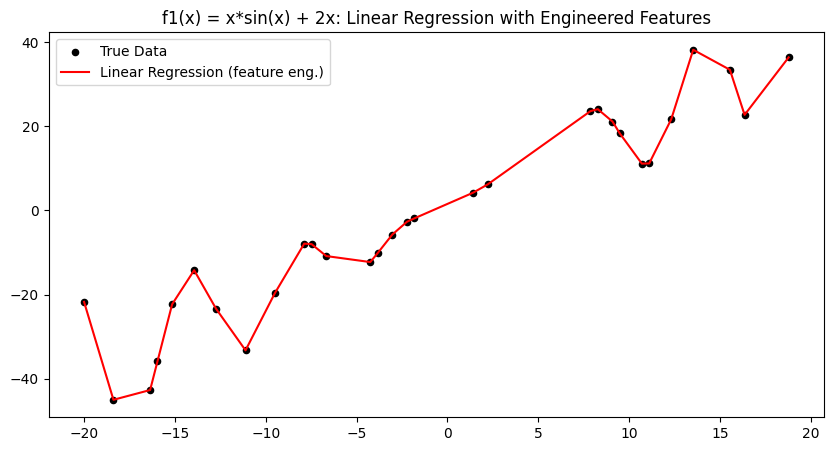

Linear Regression (engineered features): MSE=0.00, R2=1.00

===== f2(x) = 10*sin(x) + x^2 =====


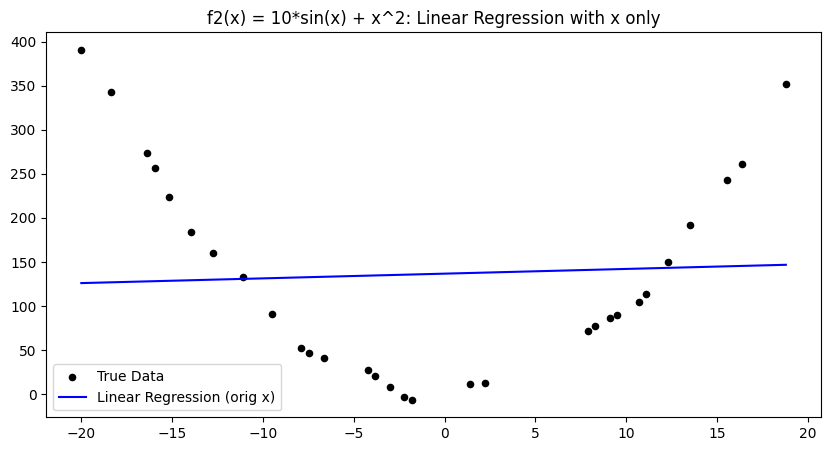

Linear Regression (x only): MSE=12926.81, R2=-0.02


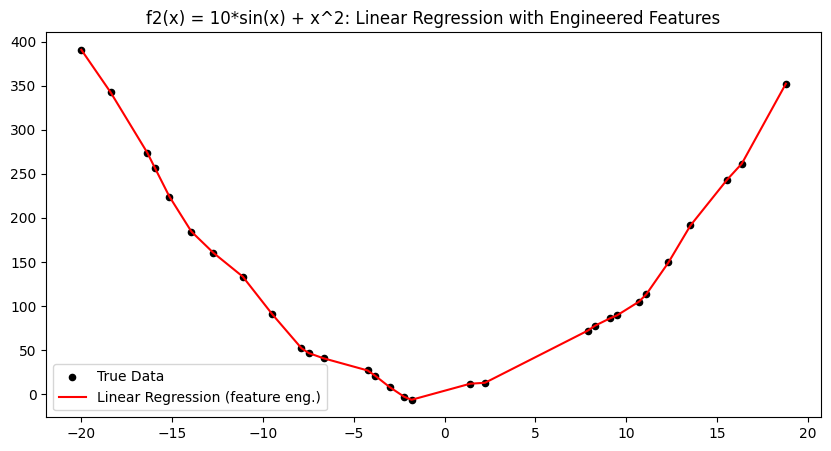

Linear Regression (engineered features): MSE=0.00, R2=1.00

===== f3(x) = sign(x)*(x^2+300) + 20*sin(x) =====


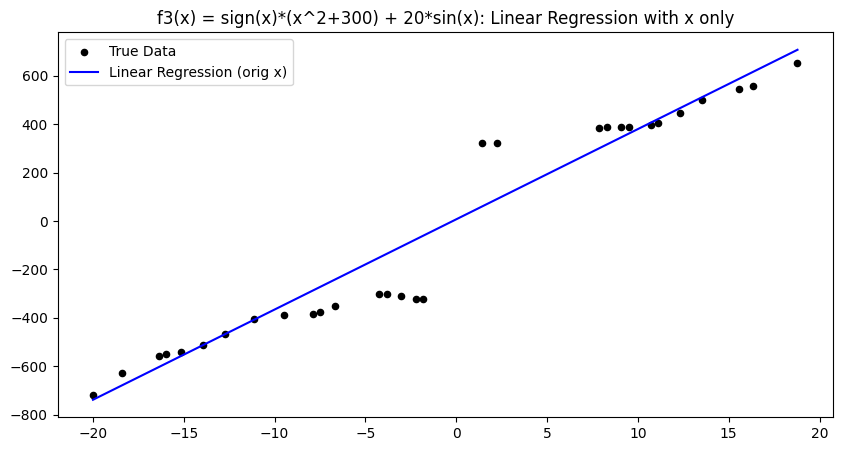

Linear Regression (x only): MSE=13568.76, R2=0.93


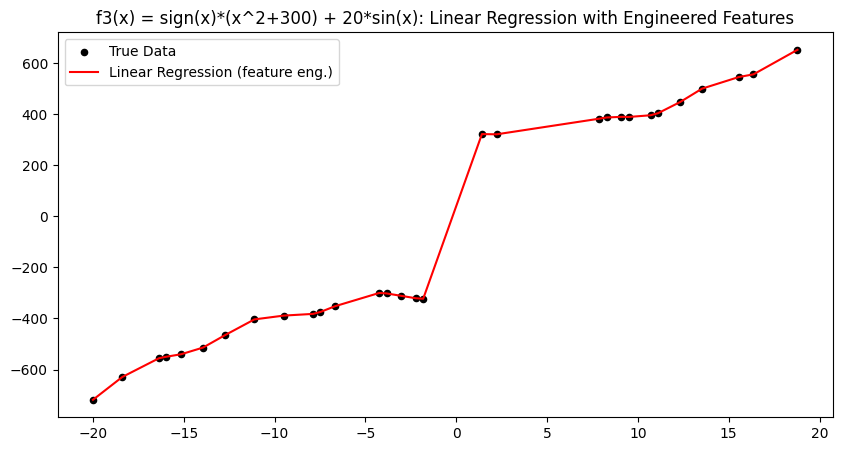

Linear Regression (engineered features): MSE=0.00, R2=1.00


In [8]:
def feature_transform_f1(x):
    return np.stack([x, np.sin(x), x * np.sin(x)], axis=1)

def feature_transform_f2(x):
    return np.stack([x, x**2, np.sin(x)], axis=1)

def feature_transform_f3(x):
    return np.stack([x, x**2, np.sign(x), np.sign(x)*x**2, np.sin(x)], axis=1)

feature_transforms = [feature_transform_f1, feature_transform_f2, feature_transform_f3]

for idx, f in enumerate(functions):
    print(f"\n===== {fnames[idx]} =====")
    y = f(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.7, random_state=42, shuffle=True
    )

    # Original
    linreg = LinearRegression()
    linreg.fit(X_train.reshape(-1, 1), y_train)
    y_pred_orig = linreg.predict(X_test.reshape(-1, 1))

    sort_idx = np.argsort(X_test)
    X_test_sorted = X_test[sort_idx]
    y_test_sorted = y_test[sort_idx]
    y_pred_orig_sorted = y_pred_orig[sort_idx]

    mse_orig = mean_squared_error(y_test_sorted, y_pred_orig_sorted)
    r2_orig = r2_score(y_test_sorted, y_pred_orig_sorted)

    plt.figure(figsize=(10,5))
    plt.scatter(X_test_sorted, y_test_sorted, color='black', label='True Data', s=20)
    plt.plot(X_test_sorted, y_pred_orig_sorted, label='Linear Regression (orig x)', color='blue')
    plt.title(f"{fnames[idx]}: Linear Regression with x only")
    plt.legend()
    plt.show()

    print(f"Linear Regression (x only): MSE={mse_orig:.2f}, R2={r2_orig:.2f}")

    # With new features
    X_train_feat = feature_transforms[idx](X_train)
    X_test_feat = feature_transforms[idx](X_test)
    linreg_feat = LinearRegression()
    linreg_feat.fit(X_train_feat, y_train)
    y_pred_feat = linreg_feat.predict(X_test_feat)

    y_pred_feat_sorted = y_pred_feat[sort_idx]
    mse_feat = mean_squared_error(y_test_sorted, y_pred_feat_sorted)
    r2_feat = r2_score(y_test_sorted, y_pred_feat_sorted)

    plt.figure(figsize=(10,5))
    plt.scatter(X_test_sorted, y_test_sorted, color='black', label='True Data', s=20)
    plt.plot(X_test_sorted, y_pred_feat_sorted, label='Linear Regression (feature eng.)', color='red')
    plt.title(f"{fnames[idx]}: Linear Regression with Engineered Features")
    plt.legend()
    plt.show()

    print(f"Linear Regression (engineered features): MSE={mse_feat:.2f}, R2={r2_feat:.2f}")

In this step, I leveraged prior knowledge about the analytical form of the target functions to engineer appropriate features for each regression task:

* For f1(x), the features x, sin(x), and x*sin(x) were used.

* For f2(x), the features x, x², and sin(x) were included.

* For f3(x), the features x, x², sign(x), sign(x)*x², and sin(x) were chosen.

After retraining linear regression models with these engineered features, the performance improved dramatically for all three functions. The MSE dropped to zero, and the R² scores reached 1.00. This shows that with the right feature set that reflects the true function structure, even a simple linear regression can achieve perfect or near-perfect fit to complex nonlinear data.

### 2.1.6 Adding real-world-like noise


===== f1(x) = x*sin(x) + 2x with Noise =====


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


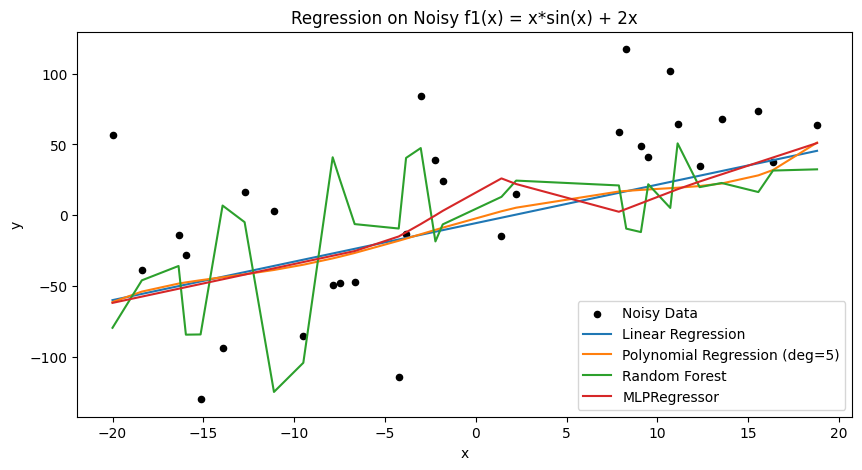


--- Metrics (Noisy) for f1(x) = x*sin(x) + 2x ---
Linear Regression: MSE=2717.86, R2=0.31
Polynomial Regression: MSE=2783.65, R2=0.30
Random Forest: MSE=4157.69, R2=-0.05
MLPRegressor: MSE=2909.70, R2=0.27

===== f2(x) = 10*sin(x) + x^2 with Noise =====


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


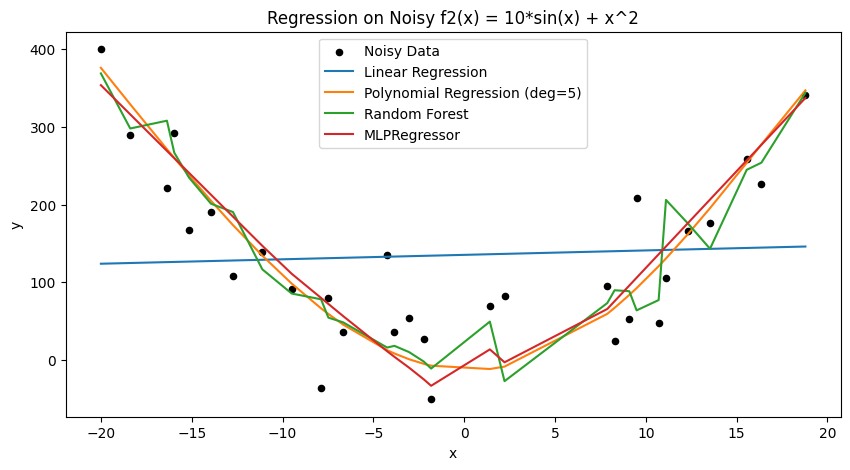


--- Metrics (Noisy) for f2(x) = 10*sin(x) + x^2 ---
Linear Regression: MSE=11741.16, R2=-0.02
Polynomial Regression: MSE=2951.81, R2=0.74
Random Forest: MSE=3529.47, R2=0.69
MLPRegressor: MSE=3153.64, R2=0.73

===== f3(x) = sign(x)*(x^2+300) + 20*sin(x) with Noise =====


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


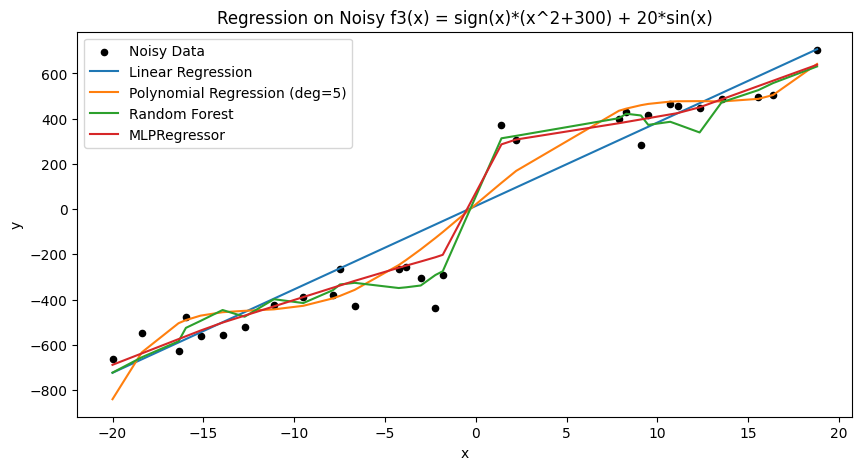


--- Metrics (Noisy) for f3(x) = sign(x)*(x^2+300) + 20*sin(x) ---
Linear Regression: MSE=18244.80, R2=0.91
Polynomial Regression: MSE=12390.96, R2=0.94
Random Forest: MSE=4978.33, R2=0.98
MLPRegressor: MSE=4763.71, R2=0.98


In [9]:
def inject_noise(y):
# Add a random noise drawn from a normal distribution.
  return y + np.random.normal(0, 50, size=y.size)

results_noise = []

for idx, f in enumerate(functions):
    print(f"\n===== {fnames[idx]} with Noise =====")
    y = f(X)
    y_noisy = inject_noise(y)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y_noisy, train_size=0.7, random_state=42, shuffle=True
    )

    linreg = LinearRegression()
    linreg.fit(X_train.reshape(-1, 1), y_train)
    y_pred_lin = linreg.predict(X_test.reshape(-1, 1))

    poly = PolynomialFeatures(degree=5)
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_test_poly = poly.transform(X_test.reshape(-1, 1))
    linreg_poly = LinearRegression()
    linreg_poly.fit(X_train_poly, y_train)
    y_pred_poly = linreg_poly.predict(X_test_poly)

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train.reshape(-1, 1), y_train)
    y_pred_rf = rf.predict(X_test.reshape(-1, 1))

    mlp = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
    mlp.fit(X_train.reshape(-1, 1), y_train)
    y_pred_mlp = mlp.predict(X_test.reshape(-1, 1))

    sort_idx = np.argsort(X_test)
    X_test_sorted = X_test[sort_idx]
    y_test_sorted = y_test[sort_idx]
    y_pred_lin_sorted = y_pred_lin[sort_idx]
    y_pred_poly_sorted = y_pred_poly[sort_idx]
    y_pred_rf_sorted = y_pred_rf[sort_idx]
    y_pred_mlp_sorted = y_pred_mlp[sort_idx]

    # draw
    plt.figure(figsize=(10, 5))
    plt.scatter(X_test_sorted, y_test_sorted, color='black', label='Noisy Data', s=20)
    plt.plot(X_test_sorted, y_pred_lin_sorted, label='Linear Regression')
    plt.plot(X_test_sorted, y_pred_poly_sorted, label='Polynomial Regression (deg=5)')
    plt.plot(X_test_sorted, y_pred_rf_sorted, label='Random Forest')
    plt.plot(X_test_sorted, y_pred_mlp_sorted, label='MLPRegressor')
    plt.legend()
    plt.title(f"Regression on Noisy {fnames[idx]}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

    # metrics
    metrics = {
        'Linear Regression': (mean_squared_error(y_test_sorted, y_pred_lin_sorted), r2_score(y_test_sorted, y_pred_lin_sorted)),
        'Polynomial Regression': (mean_squared_error(y_test_sorted, y_pred_poly_sorted), r2_score(y_test_sorted, y_pred_poly_sorted)),
        'Random Forest': (mean_squared_error(y_test_sorted, y_pred_rf_sorted), r2_score(y_test_sorted, y_pred_rf_sorted)),
        'MLPRegressor': (mean_squared_error(y_test_sorted, y_pred_mlp_sorted), r2_score(y_test_sorted, y_pred_mlp_sorted))
    }
    results_noise.append(metrics)
    print(f"\n--- Metrics (Noisy) for {fnames[idx]} ---")
    for model, (mse, r2) in metrics.items():
        print(f"{model}: MSE={mse:.2f}, R2={r2:.2f}")

After injecting strong Gaussian noise (σ=50) into the target variable, all models experienced a degradation in performance:

* Random Forest Regressor

Generally to be more robust to the noise compared to the other models. This is due to its ability to average out the influence of noisy samples.

* Polynomial Regression and MLPRegressor

They are able to keep relatively high performance but in terms of overfitting to fluctuations, they are not as good as Random Forest.

* Linear Regression

Has the performance degrade significantly, since it cannot capture the underlying nonlinear structure and cannot filter out noise effectively.


**In general, Random Forest demonstrated the highest robustness to noise, due to its tree-based ensemble methods when dealing with real-world noisy data.**

## 2.2 Multivariate regression on synthetic data

### 2.2.1 Generating random synthetic dataset

In [16]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=2000, n_features=10, noise=10, random_state=42)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First row of X:", X[0])
print("First value of y:", y[0])

# n_features: number of features, usually 10-20 to simulate real-world scenarios

# noise: standard deviation of noise, default is 0, adding a value such as 10 is more realistic

Shape of X: (2000, 10)
Shape of y: (2000,)
First row of X: [-1.38301781 -0.18140603  0.73752806  0.27524869  0.51141526  1.50808285
  0.60673     0.94782078 -2.09317802 -1.07681697]
First value of y: -155.94809961763946


### 2.2.2 Regression Pipeline Evaluation and Feature Correlation Analysis

In [17]:
# using the new random synthetic data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=42
)

# try on the previous regression models
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression (deg=2)": None,  # for later expansion
    "Random Forest": RandomForestRegressor(random_state=42),
    "MLPRegressor": MLPRegressor(max_iter=2000, random_state=42)
}

# metrics
for name, model in models.items():
    if name == "Polynomial Regression (deg=2)":
        # Polynomial feature expansion (2nd order)
        poly = PolynomialFeatures(degree=2)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        linreg_poly = LinearRegression()
        linreg_poly.fit(X_train_poly, y_train)
        y_pred = linreg_poly.predict(X_test_poly)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
    print(f"{name:30} | R2 = {r2:.4f}, MSE = {mse:.2f}")

Linear Regression              | R2 = 0.9971, MSE = 103.36
Polynomial Regression (deg=2)  | R2 = 0.9969, MSE = 109.18
Random Forest                  | R2 = 0.8673, MSE = 4660.42
MLPRegressor                   | R2 = 0.9966, MSE = 119.04


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


* How does your model handle the presence of multiple features?

Based on the evaluation results, Linear Regression achieved the best performance, with the highest R² (0.9971) and the lowest MSE (103.36) among all models. Since the synthetic dataset is generated using a linear combination of features with added noise.

Polynomial Regression (degree=2) and MLPRegressor also performed well, just heind linear regression. This shows that both models are capable of capturing the underlying relationship, but they don't have advantage over normal linear regression for this data.

In contrast, Random Forest showed a noticeably lower R² (0.8673) and a much higher MSE (4660.42), which means tree-based ensemble methods may not be as efficient as linear models when the data is generated by a linear process. Random Forest can be less effective when the true relationship is strictly linear and the data does not contain strong nonlinear patterns or complex feature interactions.

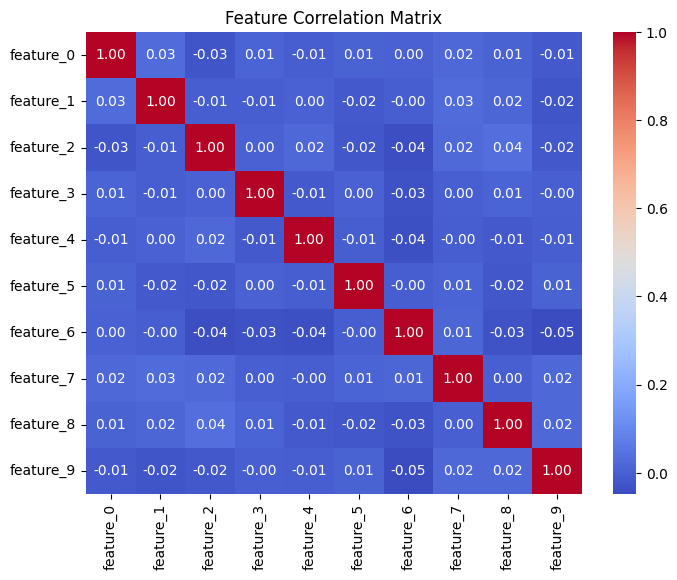

In [21]:
import pandas as pd
import seaborn as sns

# converting to dataframe
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
corr_matrix = df.corr()

# draw heat map for correlation visualization
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

* Is there any correlation among features? How does this impact the model performance?

The feature correlation matrix shows that all input features are essentially uncorrelated, with pairwise correlation coefficients close to zero. This is because the dataset was generated using the default settings of make_regression, which creates independent features.

Therefore, the regression model can easily distinguish the contribution of each feature. In real data, high correlation between features (multicollinearity) can make model coefficients unstable and difficult to interpret, and may hurt predictive performance unless mitigated by preprocessing or regularization.


Linear regression Feature Importances:


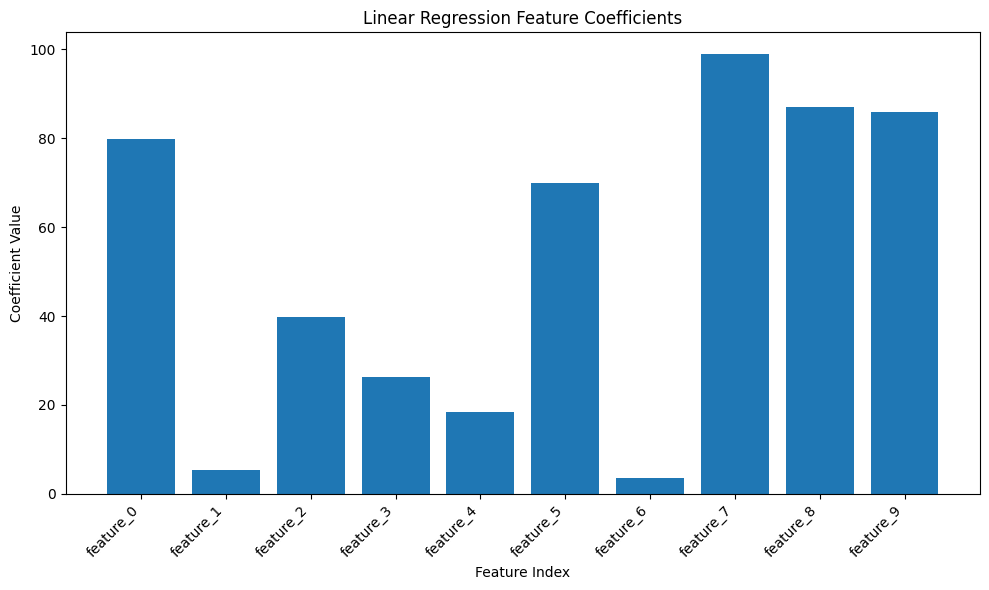


Random Forest Feature Importances:


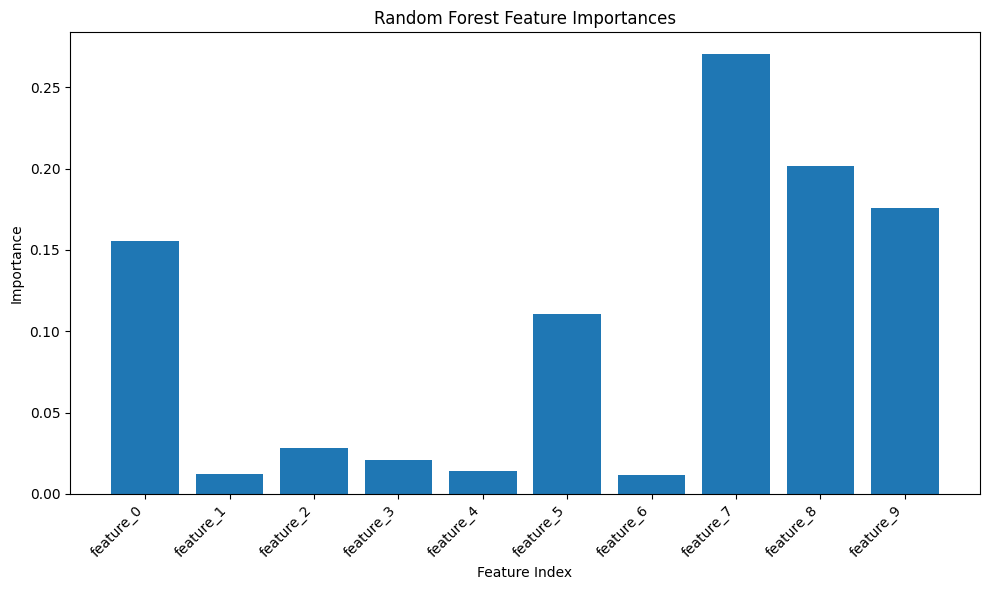

In [25]:
# Linear Regression Coefficients
# Refit Linear Regression model to get the coefficients
linreg_final = LinearRegression()
linreg_final.fit(X_train, y_train) # Use the train data from the previous split
coef = linreg_final.coef_

n_features = X_train.shape[1]
feature_labels = [f'feature_{i}' for i in range(n_features)]


print("\nLinear regression Feature Importances:")
plt.figure(figsize=(10, 6))
plt.bar(range(n_features), coef)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Linear Regression Feature Coefficients')
plt.xticks(range(n_features), feature_labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Random Forest Feature Importances
# Refit Random Forest model to get feature importances
rf_final = RandomForestRegressor(random_state=42)
rf_final.fit(X_train, y_train) # Use the train data from the previous split
importances = rf_final.feature_importances_

print("\nRandom Forest Feature Importances:")
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.xticks(range(X.shape[1]), [f'feature_{i}' for i in range(X.shape[1])], rotation=45, ha='right') # Add feature labels
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

The bar chart above shows the feature importance calculated by the linear regression and random forest models.

We can see that feature_7, feature_8, feature_9, and feature_0 have higher coefficients, indicating that they contribute more to the target variable.

Both models consistently identify the same set of features as the ones that have the greatest impact on the prediction, confirming that the regression results are reliable.

### 2.2.3 Testing Model Robustness with more Noise and Non-informative Features

In [28]:

# Regenerate a more difficult dataset (n_features=20, n_informative=3, noise=40)
X_hard, y_hard = make_regression(n_samples=2000, n_features=20, n_informative=3, noise=40, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_hard, y_hard, train_size=0.7, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression (deg=2)": None,
    "Random Forest": RandomForestRegressor(random_state=42),
    "MLPRegressor": MLPRegressor(max_iter=2000, random_state=42)
}

for name, model in models.items():
    if name == "Polynomial Regression (deg=2)":
        poly = PolynomialFeatures(degree=2)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        linreg_poly = LinearRegression()
        linreg_poly.fit(X_train_poly, y_train)
        y_pred = linreg_poly.predict(X_test_poly)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
    print(f"{name:30} | R2 = {r2:.4f}, MSE = {mse:.2f}")


Linear Regression              | R2 = 0.8905, MSE = 1657.01
Polynomial Regression (deg=2)  | R2 = 0.8699, MSE = 1969.11
Random Forest                  | R2 = 0.8514, MSE = 2249.47
MLPRegressor                   | R2 = 0.8650, MSE = 2042.59


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


* How does the model behave in this case?

As we can see the comparison between harder dataset and the normal one:

Standard Task (No Noise, 10 Informative Features as default):
Linear Regression: R² = 0.9971, MSE = 103.36

Polynomial Regression (deg=2): R² = 0.9969, MSE = 109.18

Random Forest: R² = 0.8673, MSE = 4660.42

MLPRegressor: R² = 0.9966, MSE = 119.04

Harder Task (Noise=40, Only 3 Informative Features out of 20):
Linear Regression: R² = 0.8905, MSE = 1657.01

Polynomial Regression (deg=2): R² = 0.8699, MSE = 1969.11

Random Forest: R² = 0.8514, MSE = 2249.47

MLPRegressor: R² = 0.8650, MSE = 2042.59


* When the dataset is noisier, less informative, and has more irrelevant features, all models’ R² drops significantly, while MSE increases dramatically.

* Linear and polynomial regression show the highest R² in both cases, but the performance gap narrows in the harder case.

* Random Forest and Neural networks (MLPRegressor) can handle irrelevant features, but it is still sensitive to noise, resulting in a drop in performance.



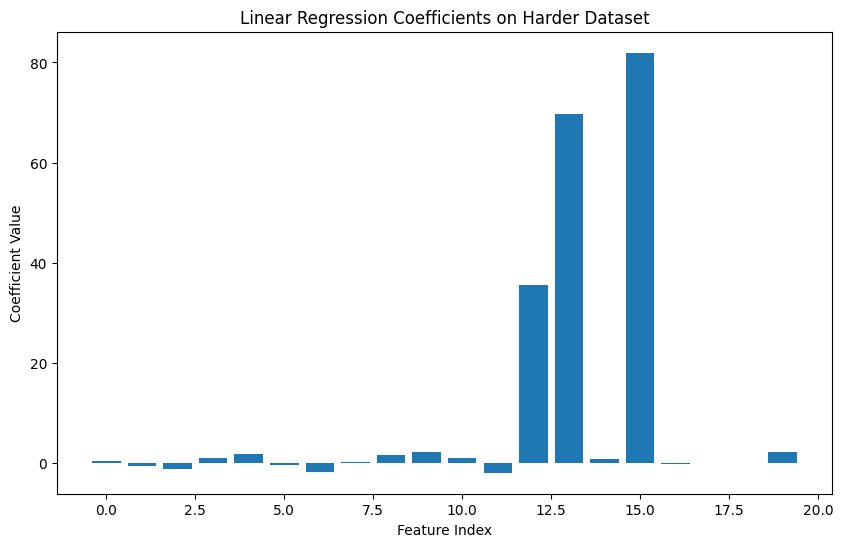

Informative features (first 3):
Informative Feature 0: 0.526
Informative Feature 1: -0.578
Informative Feature 2: -1.131

Non-informative features (remaining):
Non-informative Feature 3: 1.070
Non-informative Feature 4: 1.745
Non-informative Feature 5: -0.316
Non-informative Feature 6: -1.768
Non-informative Feature 7: 0.157
Non-informative Feature 8: 1.635
Non-informative Feature 9: 2.181
Non-informative Feature 10: 0.944
Non-informative Feature 11: -1.898
Non-informative Feature 12: 35.605
Non-informative Feature 13: 69.670
Non-informative Feature 14: 0.838
Non-informative Feature 15: 81.940
Non-informative Feature 16: -0.237
Non-informative Feature 17: 0.134
Non-informative Feature 18: -0.047
Non-informative Feature 19: 2.263


In [30]:
# Train Linear Regression on harder dataset
linreg_hard = LinearRegression()
linreg_hard.fit(X_train, y_train)
coef_hard = linreg_hard.coef_

# visualize coefficients
plt.figure(figsize=(10,6))
plt.bar(range(len(coef_hard)), coef_hard)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Linear Regression Coefficients on Harder Dataset')
plt.show()

# informative and non-informative
print("Informative features (first 3):")
for i in range(3):
    print(f"Informative Feature {i}: {coef_hard[i]:.3f}")
print("\nNon-informative features (remaining):")
for i in range(3, len(coef_hard)):
    print(f"Non-informative Feature {i}: {coef_hard[i]:.3f}")


* Train a Linear Regressor and inspect the coefficients learned for the non-informative features.
What do these values mean?

After training a linear regression on a noisier and less informative dataset, we observe that only a few features have large coefficients, while most features have coefficients close to zero. However, some non-informative features other than 3, such as feature_12, feature_13, feature_15, are assigned relatively large coefficients, even though they should not contribute to the prediction. This indicates that the model is fitting the noise in the data and cannot reliably distinguish between informative and non-informative features in the presence of high noise and feature redundancy. This results in a decrease in the model's generalization ability on new data.

## 2.3 Temperature series forecasting

### 2.3.1 Load the weather dataset

In [36]:
df = pd.read_csv('SummaryofWeather.csv')

# view the basic info
print(df.info())
print(df.describe())

<ipython-input-36-e295c8ea0de6>:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SummaryofWeather.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

2.3.2 Data Inspection, Sensor Completeness, and Pre-processing insights


Number of data samples from each sensor (Top 20):
STA
22508    2192
10701    2185
22502    2154
22504    2118
10803    1750
11610    1631
16405    1622
11601    1604
10502    1527
11604    1514
20501    1497
16504    1492
13601    1487
11704    1471
10804    1367
11901    1360
81702    1358
50801    1358
16407    1336
10705    1332
Name: count, dtype: int64


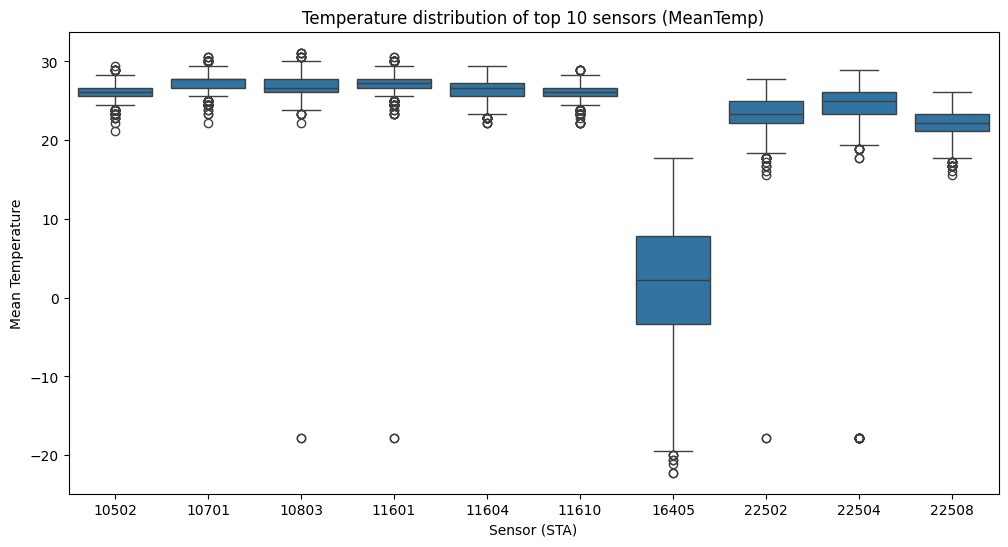

In [40]:
# Check the integrity of the data collected by each sensor (which is the station)
station_counts = df['STA'].value_counts()
print("\nNumber of data samples from each sensor (Top 20):")
print(station_counts.head(20))

# Top 10
top10_stations = station_counts.head(10).index.tolist()

# Analyze the temperature distribution of these sensors
top10_df = df[df['STA'].isin(top10_stations)]

plt.figure(figsize=(12,6))
sns.boxplot(x='STA', y='MeanTemp', data=top10_df)
plt.title("Temperature distribution of top 10 sensors (MeanTemp)")
plt.xlabel("Sensor (STA)")
plt.ylabel("Mean Temperature")
plt.show()

* Q1. Can you identify if these sensors are located in part of the world with similar weather conditions?

The box plot shows that, except for the 16405 observation station, the daily mean temperatures (MeanTemp) recorded by the other top 10 sensors are mostly concentrated between 20℃ and 30℃, with small fluctuations. This is consistent with the climate characteristics of tropical or subtropical regions, and may be distributed in areas near the equator.
Only the daily mean temperature of station 16405 is significantly lower, and the temperature difference range is large, with extreme low temperatures, indicating that it is likely located in temperate or cold regions (such as high latitudes or high altitudes).

* Q2. Is it necessary to normalize the data in this case?

Although MeanTemp is already in degrees Celsius and all observation stations have the same unit, if other meteorological features are introduced and the feature dimensions are not uniform, it is better to normalize or standardize all input features. Especially for models such as neural networks and regularized regression, which are very sensitive to feature scale, normalization can speed up convergence and improve model performance.

**Q3. Which pre-processing step can be useful to solve the forecasting task?**

* Missing value handling: fill missing temperature values ​​with mean, median or interpolation methods (such as "predict missing days with the average temperature of the previous 7 days"),

* Outlier handling: identify and handle obvious abnormal or extreme temperatures to reduce model interference.

* Normalization/Standardization: unify the dimensions of all features.

* Group by station: If the prediction focuses on only one observation station (22508), the data of the station needs to be filtered before processing.

### 2.3.3 22508 Station and mean tempreature

In [53]:
import pandas as pd

df_22508 = df[df['STA'] == 22508].copy()

# check Datetime type
print(df_22508['Date'].head())

# transfer to datetime64 format
print("============transferred============")
df_22508['Date'] = pd.to_datetime(df_22508['Date'])

print(df_22508['Date'].head())

# ectract the mean tempreature measurements
df_sensor = df_22508[['Date', 'MeanTemp']].sort_values('Date').reset_index(drop=True)

# checking
print(df_sensor.head())

57877    1940-1-1
57878    1940-1-2
57879    1940-1-3
57880    1940-1-4
57881    1940-1-5
Name: Date, dtype: object
============transferred============
57877   1940-01-01
57878   1940-01-02
57879   1940-01-03
57880   1940-01-04
57881   1940-01-05
Name: Date, dtype: datetime64[ns]
        Date   MeanTemp
0 1940-01-01  20.000000
1 1940-01-02  19.444444
2 1940-01-03  20.000000
3 1940-01-04  21.111111
4 1940-01-05  18.333333


### 2.3.4 Plotting the Temperature Time Series for 22508

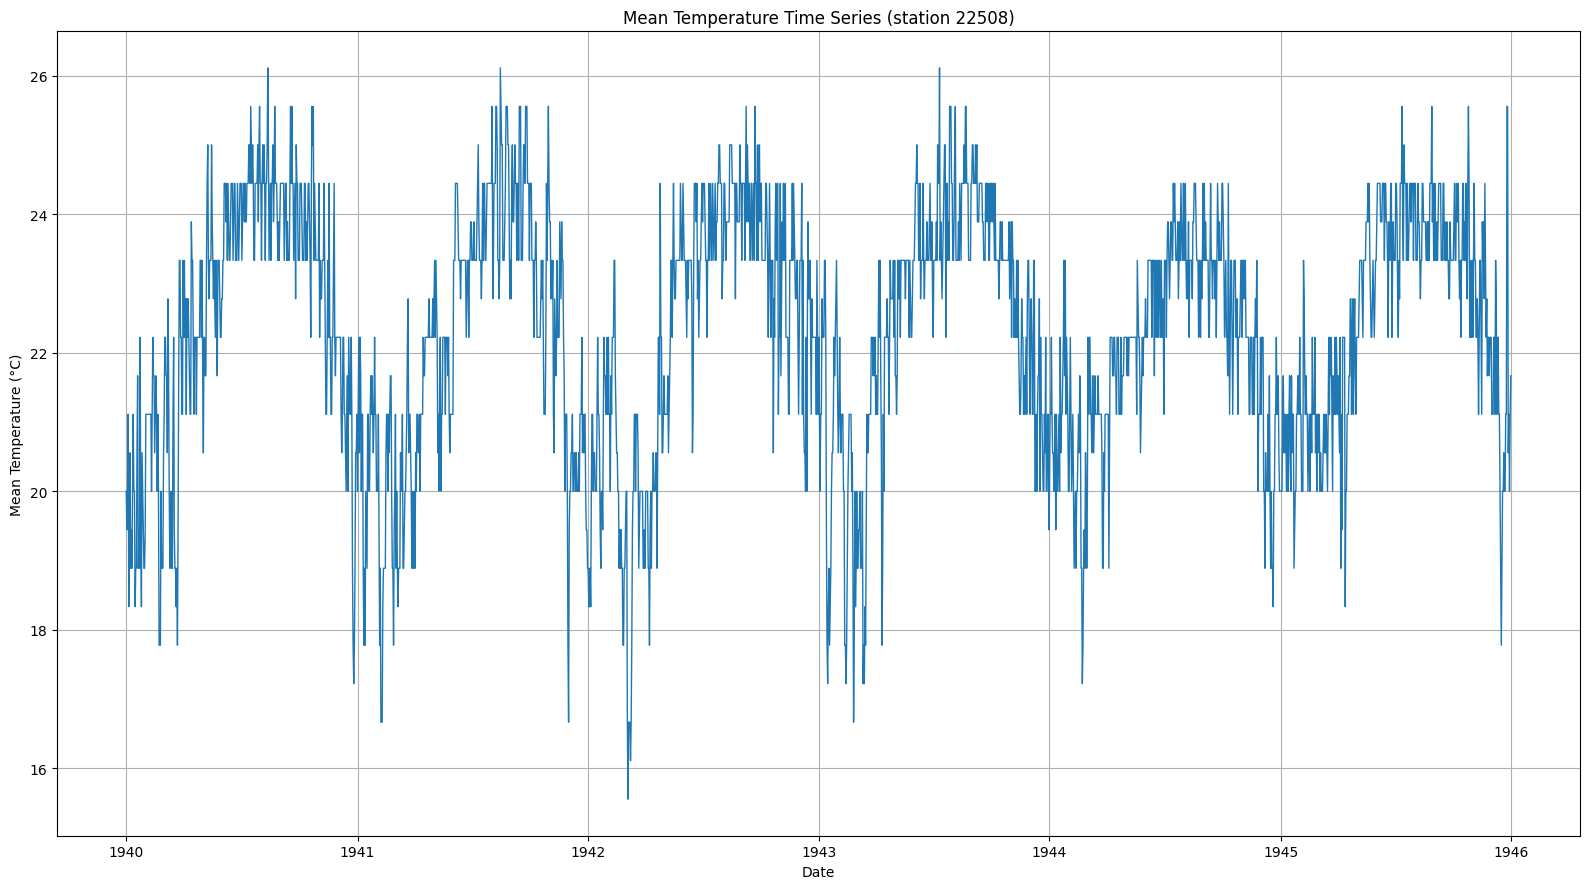

In [57]:
plt.figure(figsize=(16, 9))
plt.plot(df_sensor['Date'], df_sensor['MeanTemp'], color='tab:blue', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Temperature Time Series (station 22508)')
plt.grid(True)
plt.tight_layout()
plt.show()

### 2.3.5 Rolling Window Pre-processing for Time Series Forecasting

In [64]:
# Window length = 1 week could be a good choice, not too long or too short.
window_size = 7
features = []
targets = []
dates = []

mean_temps = df_sensor['MeanTemp'].values
date_series = df_sensor['Date'].values

# Build rolling window dataset
for i in range(len(mean_temps) - window_size):
    # 7 days as features, the 8th day as target
    features.append(mean_temps[i:i+window_size])
    targets.append(mean_temps[i+window_size])
    dates.append(date_series[i+window_size])

# Convert to DataFrame
X = np.array(features)
y = np.array(targets)
target_dates = pd.to_datetime(dates)

# build DataFrame for visualization
df_rolling = pd.DataFrame(X, columns=[f"Day_{i+1}" for i in range(window_size)])
df_rolling['Target'] = y
df_rolling['TargetDate'] = target_dates

# Preview the rolling window dataset
print(df_rolling.head())

       Day_1      Day_2      Day_3      Day_4      Day_5      Day_6  \
0  20.000000  19.444444  20.000000  21.111111  18.333333  20.000000   
1  19.444444  20.000000  21.111111  18.333333  20.000000  20.555556   
2  20.000000  21.111111  18.333333  20.000000  20.555556  18.888889   
3  21.111111  18.333333  20.000000  20.555556  18.888889  19.444444   
4  18.333333  20.000000  20.555556  18.888889  19.444444  18.888889   

       Day_7     Target TargetDate  
0  20.555556  18.888889 1940-01-08  
1  18.888889  19.444444 1940-01-09  
2  19.444444  18.888889 1940-01-10  
3  18.888889  20.000000 1940-01-11  
4  20.000000  21.111111 1940-01-12  


### 2.3.6 Split the dataset into train and test sets for time series forecasting

In [65]:
# Ensure 'TargetDate' column is of datetime type
df_rolling['TargetDate'] = pd.to_datetime(df_rolling['TargetDate'])

# Split the dataset: Train = 1940-1944, Test = 1945
train_mask = df_rolling['TargetDate'].dt.year < 1945
test_mask = df_rolling['TargetDate'].dt.year == 1945

train_df = df_rolling[train_mask].reset_index(drop=True)
test_df = df_rolling[test_mask].reset_index(drop=True)

# Define feature columns
feature_cols = [f'Day_{i+1}' for i in range(7)]
X_train = train_df[feature_cols]
y_train = train_df['Target']
X_test = test_df[feature_cols]
y_test = test_df['Target']

print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)
print("Train period:", train_df['TargetDate'].min().date(), "~", train_df['TargetDate'].max().date())
print("Test period:", test_df['TargetDate'].min().date(), "~", test_df['TargetDate'].max().date())


Train set: (1820, 7) (1820,)
Test set: (365, 7) (365,)
Train period: 1940-01-08 ~ 1944-12-31
Test period: 1945-01-01 ~ 1945-12-31


### 2.3.7 Model Selection for Time Series Forecasting

In [66]:
# Prepare results dict
results = {}

# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin = linreg.predict(X_test)
results['Linear Regression'] = {
    'R2': r2_score(y_test, y_pred_lin),
    'MSE': mean_squared_error(y_test, y_pred_lin)
}

# Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
linreg_poly = LinearRegression()
linreg_poly.fit(X_train_poly, y_train)
y_pred_poly = linreg_poly.predict(X_test_poly)
results['Polynomial Regression (deg=2)'] = {
    'R2': r2_score(y_test, y_pred_poly),
    'MSE': mean_squared_error(y_test, y_pred_poly)
}

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results['Random Forest'] = {
    'R2': r2_score(y_test, y_pred_rf),
    'MSE': mean_squared_error(y_test, y_pred_rf)
}

# MLP Regressor
mlp = MLPRegressor(max_iter=2000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
results['MLPRegressor'] = {
    'R2': r2_score(y_test, y_pred_mlp),
    'MSE': mean_squared_error(y_test, y_pred_mlp)
}

# Print results
print('Model performance on the test set:')
for model, metrics in results.items():
    print(f"{model:30} | R2 = {metrics['R2']:.4f}, MSE = {metrics['MSE']:.2f}")

Model performance on the test set:
Linear Regression              | R2 = 0.6874, MSE = 0.74
Polynomial Regression (deg=2)  | R2 = 0.6796, MSE = 0.75
Random Forest                  | R2 = 0.6490, MSE = 0.83
MLPRegressor                   | R2 = 0.6763, MSE = 0.76


Of the four regression models tested, linear regression achieved the highest performance on the test set, with polynomial regression (order=2) and MLPRegressor performing very similarly. MSE values ​​were slightly higher (0.75 and 0.76, respectively). Random Forest performed slightly worse, with an R² score of 0.6490 and an MSE of 0.83.

These results suggest that for a rolling window of 7 days, simple linear relationships are able to capture most of the temporal dynamics in the data. More complex models did not show a clear advantage, likely due to the limited length of the temperature time series and the relatively regular patterns.

Linear regression is by far the most accurate model, but the absolute performance is not perfect. This suggests that predicting daily temperatures using only the past 7 days of data as input is not enough, and more context needs to be incorporated to improve prediction accuracy.

### 2.3.8 Visualize the Forecasted and Real Temperature Series

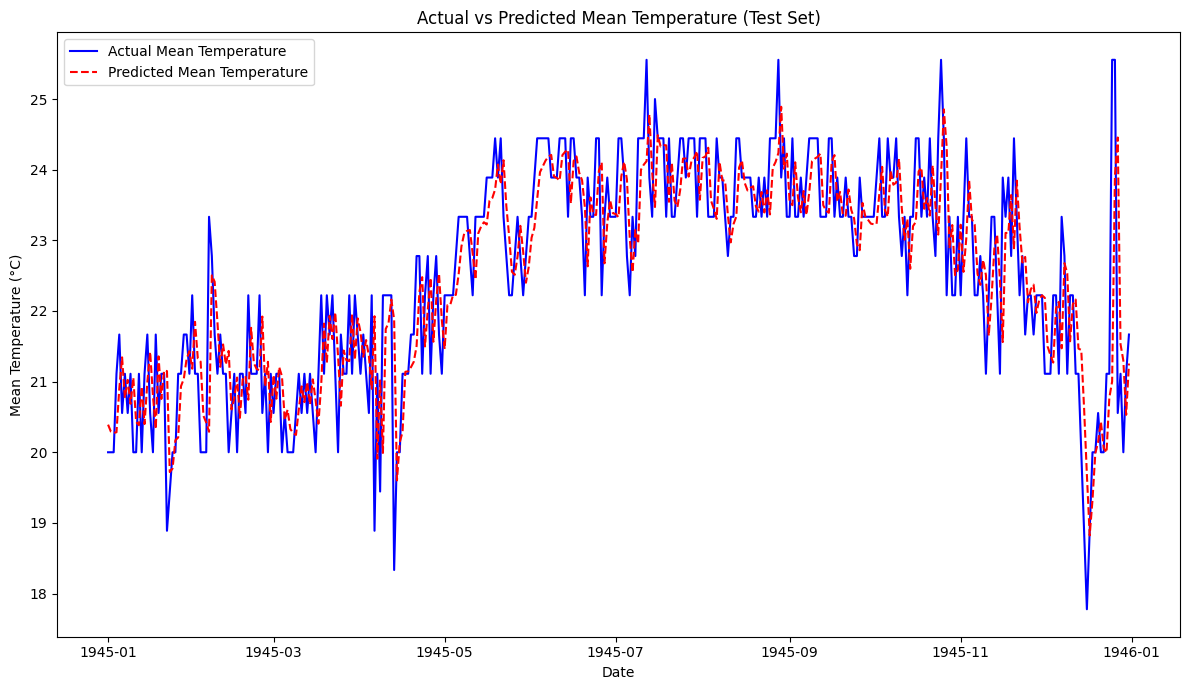

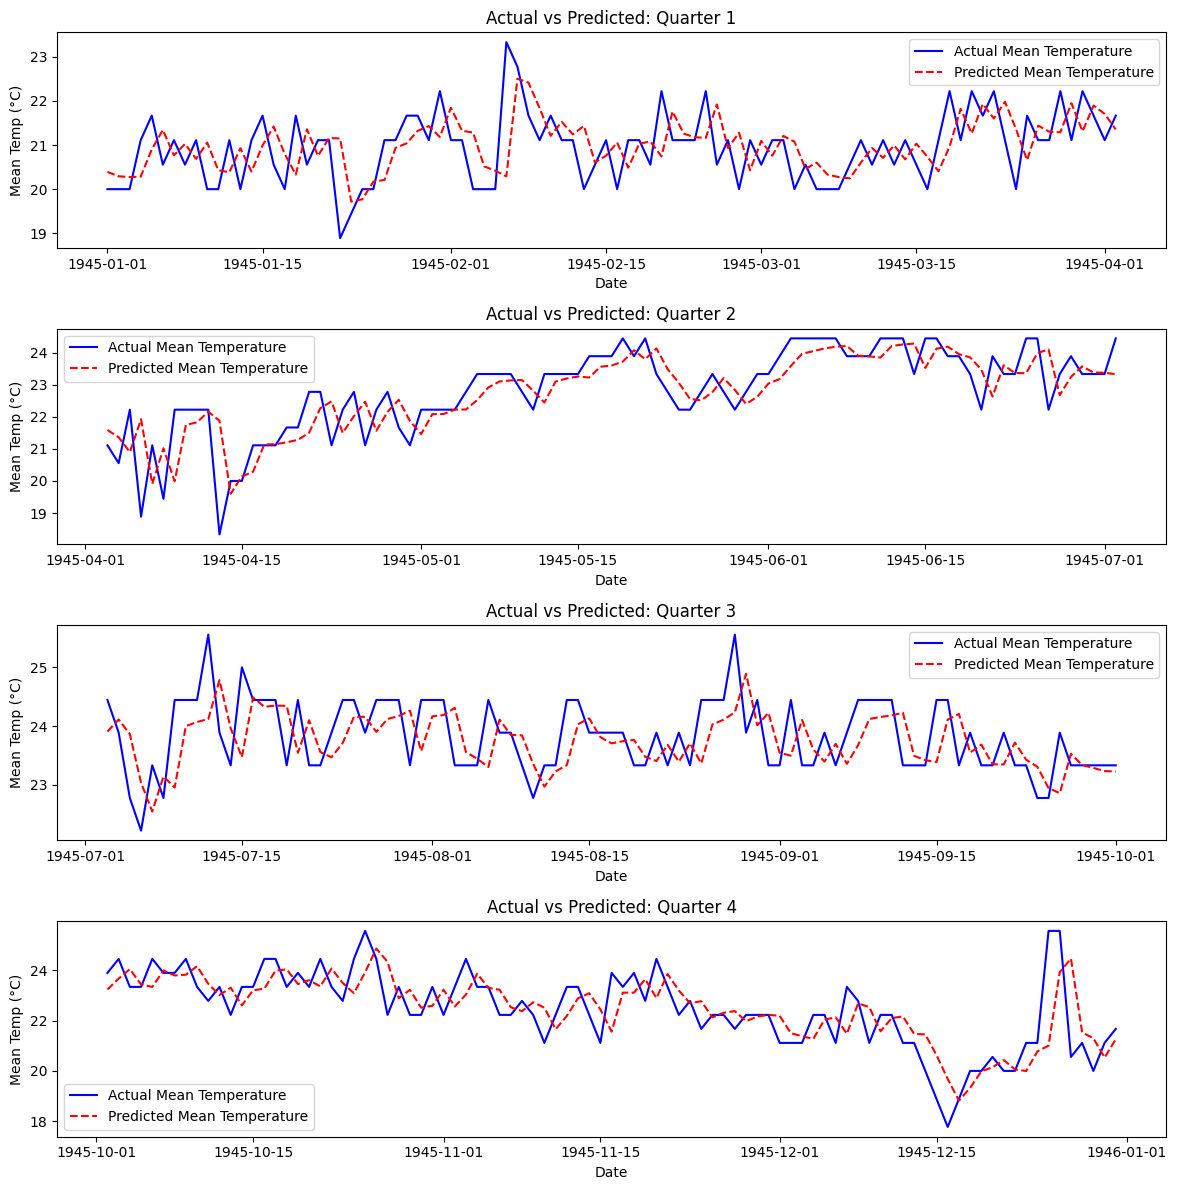

In [70]:
# Get predicted values using the best model (e.g., Linear Regression)
best_model = LinearRegression()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Plot actual vs predicted for the test period
plt.figure(figsize=(12, 7))
plt.plot(test_df['TargetDate'], y_test, label='Actual Mean Temperature', color='b')
plt.plot(test_df['TargetDate'], y_pred, label='Predicted Mean Temperature', color='r', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.title('Actual vs Predicted Mean Temperature (Test Set)')
plt.legend()
plt.tight_layout()
plt.show()

# Show the comparison in each quater
# Divide test data into 4 quarters
test_df['TargetDate'] = pd.to_datetime(test_df['TargetDate'])
quarters = pd.qcut(test_df['TargetDate'], q=4, labels=False)

plt.figure(figsize=(12, 12))

for i in range(4):
    plt.subplot(4, 1, i + 1)
    quarter_mask = (quarters == i)
    plt.plot(test_df.loc[quarter_mask, 'TargetDate'], y_test[quarter_mask], label='Actual Mean Temperature', color='b')
    plt.plot(test_df.loc[quarter_mask, 'TargetDate'], y_pred[quarter_mask], label='Predicted Mean Temperature', color='r', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Mean Temp (°C)')
    plt.title(f'Actual vs Predicted: Quarter {i + 1}')
    plt.legend()
    plt.tight_layout()

plt.show()

* 1. Are the two series similar?

From the annual and quarterly comparison charts, the overall trend of the predicted value (red dotted line) and the actual value (blue solid line) is similar. Especially in the main trend of temperature change, the model prediction can track the actual change well. However, the detailed fluctuations are sometimes not accurate enough, and the predicted value overall "lags" the actual value.

* 2. Have the seasonality and the trend of the series been correctly predicted?

Both seasonality and overall trends are partially captured by the model. For example, the high temperature in summer and the low temperature in winter have obvious annual periodicity, which can be reproduced by the model. However, in some stages of rapid rise or fall, the model performance lags slightly. This shows that the model is better at capturing stable trends and is not sensitive enough to sudden and drastic temperature changes.

* 3. Are you able to predict a horizon longer than 1 day with this kind of techniques? Why?

Using this rolling window and simple regression approach, the prediction results for the next 2 or 3 days are usually worse. If you want to predict further, you will use the model's "own prediction results" as a new round of input, and the errors will accumulate and amplify (error propagation). This approach only models short-term linear relationships, and does not model complex dependencies on long time series (such as longer lag effects, abnormal cycles, etc.).

* My own thoughts:

Using more complex time series modeling methods, such as ARIMA, LSTM (recurrent neural network), etc., can reduce lag phenomena and better capture rapid changes and nonlinear relationships.

For the regression model, the next last task can increase input features (such as adding more lagged days of data) or try different window lengths, but pure linear/polynomial regression is still limited in nature.

### 2.3.9 Experiments for Improving Time Series Forecasting

For data pre-processing, I will use **cross-validation using TimeSeriesSplit** to determine the optimal window length.

In [87]:
from sklearn.model_selection import TimeSeriesSplit

window_range = range(3, 31)  # try rolling windows from 3 - one month
results = []

for window in window_range:

    features = []
    targets = []
    for i in range(window, len(df_sensor)):
        features.append(df_sensor['MeanTemp'].iloc[i-window:i].values)
        targets.append(df_sensor['MeanTemp'].iloc[i])
    X = np.array(features)
    y = np.array(targets)

    # time series cross validation
    tscv = TimeSeriesSplit(n_splits=5)
    r2_list = []
    mse_list = []
    for train_idx, test_idx in tscv.split(X):
        X_train, X_val = X[train_idx], X[test_idx]
        y_train, y_val = y[train_idx], y[test_idx]
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        r2_list.append(r2_score(y_val, y_pred))
        mse_list.append(mean_squared_error(y_val, y_pred))
    results.append({
        'window': window,
        'mean_r2': np.mean(r2_list),
        'mean_mse': np.mean(mse_list)
    })

best = max(results, key=lambda x: x['mean_r2'])
print(f"Best window length: {best['window']}, Mean R2: {best['mean_r2']:.4f}, Mean MSE: {best['mean_mse']:.4f}")


Best window length: 10, Mean R2: 0.7563, Mean MSE: 0.7135


Now we find a better window length 10, try to see if it's better than 7:

In [88]:
# 1. Change rolling window size 10
window_size = 10

features = []
targets = []
target_dates = []

for i in range(len(df_sensor) - window_size):
    window = df_sensor['MeanTemp'].iloc[i:i+window_size].values
    target = df_sensor['MeanTemp'].iloc[i+window_size]
    date = df_sensor['Date'].iloc[i+window_size]
    features.append(window)
    targets.append(target)
    target_dates.append(date)

df_rolling10 = pd.DataFrame(features, columns=[f'Day_{i+1}' for i in range(window_size)])
df_rolling10['Target'] = targets
df_rolling10['TargetDate'] = pd.to_datetime(target_dates)

# split the train-test set, rename to df_rolling10
train_mask = df_rolling10['TargetDate'].dt.year < 1945
test_mask = df_rolling10['TargetDate'].dt.year == 1945
train_df = df_rolling10[train_mask].reset_index(drop=True)
test_df = df_rolling10[test_mask].reset_index(drop=True)

feature_cols = [f'Day_{i+1}' for i in range(window_size)]
X_train = train_df[feature_cols]
y_train = train_df['Target']
X_test = test_df[feature_cols]
y_test = test_df['Target']

# Prepare results dict
results = {}

# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin = linreg.predict(X_test)
results['Linear Regression'] = {
    'R2': r2_score(y_test, y_pred_lin),
    'MSE': mean_squared_error(y_test, y_pred_lin)
}

# Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
linreg_poly = LinearRegression()
linreg_poly.fit(X_train_poly, y_train)
y_pred_poly = linreg_poly.predict(X_test_poly)
results['Polynomial Regression (deg=2)'] = {
    'R2': r2_score(y_test, y_pred_poly),
    'MSE': mean_squared_error(y_test, y_pred_poly)
}

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results['Random Forest'] = {
    'R2': r2_score(y_test, y_pred_rf),
    'MSE': mean_squared_error(y_test, y_pred_rf)
}

# MLP Regressor
mlp = MLPRegressor(max_iter=2000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
results['MLPRegressor'] = {
    'R2': r2_score(y_test, y_pred_mlp),
    'MSE': mean_squared_error(y_test, y_pred_mlp)
}

# Print results
print('Model performance on the test set:')
for model, metrics in results.items():
    print(f"{model:30} | R2 = {metrics['R2']:.4f}, MSE = {metrics['MSE']:.2f}")

Model performance on the test set:
Linear Regression              | R2 = 0.6900, MSE = 0.73
Polynomial Regression (deg=2)  | R2 = 0.6737, MSE = 0.77
Random Forest                  | R2 = 0.6609, MSE = 0.80
MLPRegressor                   | R2 = 0.6785, MSE = 0.76


Model performance changes after the window period is extended
Linear Regression's R² increased from 0.6874 to 0.6900, and MSE decreased from 0.74 to 0.73
This shows that for linear regression, appropriately extending the window length (inputting more historical days) can help improve the prediction ability, and the model can capture longer-term temperature trend information.

The R² and MSE of the three models, Polynomial Regression (deg=2), Random Forest, and MLPRegressor, changed very little, and even decreased slightly or almost did not increase. This shows that increasing the historical window period is of limited help to them, probably because these models can already capture short-term and nonlinear changes, and adding a few more days of input is not very helpful for the overall fit, and even introduces redundancy or noise.

Now let's try to use a more complex model **(XGB regressor)** with many tuning options to see if it could be better than the simple linear regression model.

In [93]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',
    cv=tscv,   # safer for time series data
    n_jobs=-1,
    verbose=2
)

# X_train, y_train from df_rolling10
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated R2 score:", grid_search.best_score_)

# Evaluate the best estimator on the test set
best_xgb = grid_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"Test R2: {r2_xgb:.4f}, Test MSE: {mse_xgb:.2f}")

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.7}
Best cross-validated R2 score: 0.746286007207264
Test R2: 0.6961, Test MSE: 0.72


After using the XGBoost regressor and performing hyperparameter tuning with GridSearchCV, the test results show a slight improvement over the best linear regression model (R² = 0.69, MSE = 0.73).

Even in relatively simple prediction tasks, more advanced models like XGBoost can capture additional nonlinear patterns or interactions in the data that simple linear regression may miss.

However, the improvement is not large, which suggests that the underlying relationship between features and targets is still mainly linear, or that the problem itself is difficult to improve beyond a certain point based on the existing data.

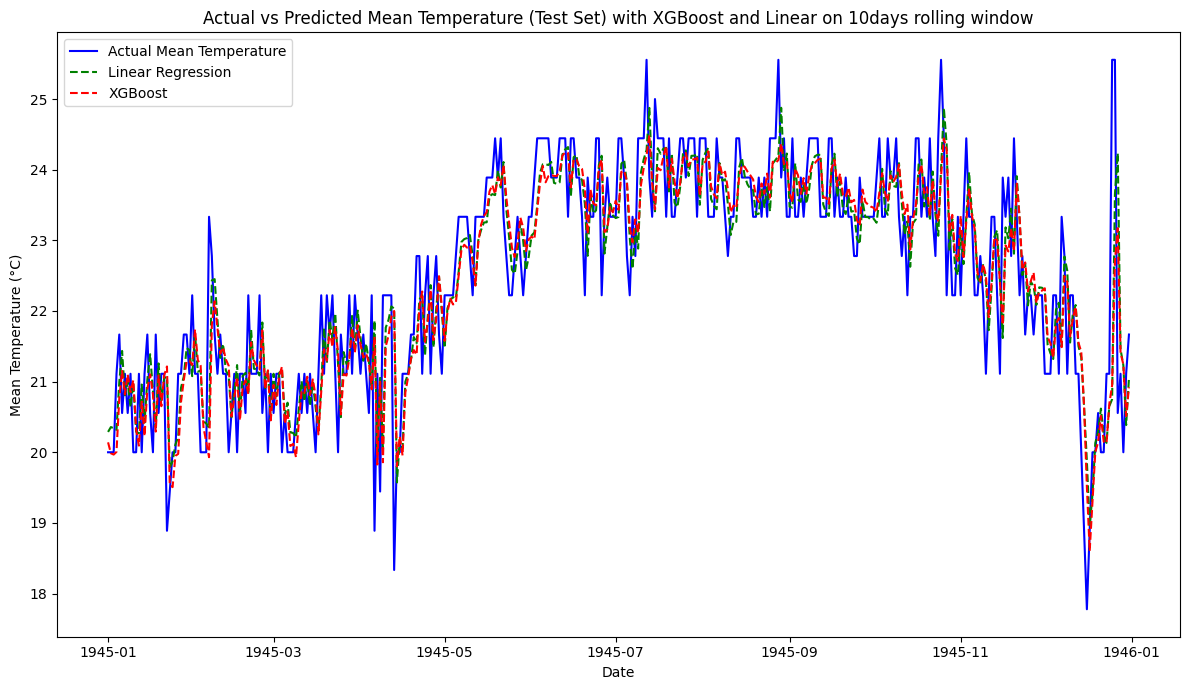

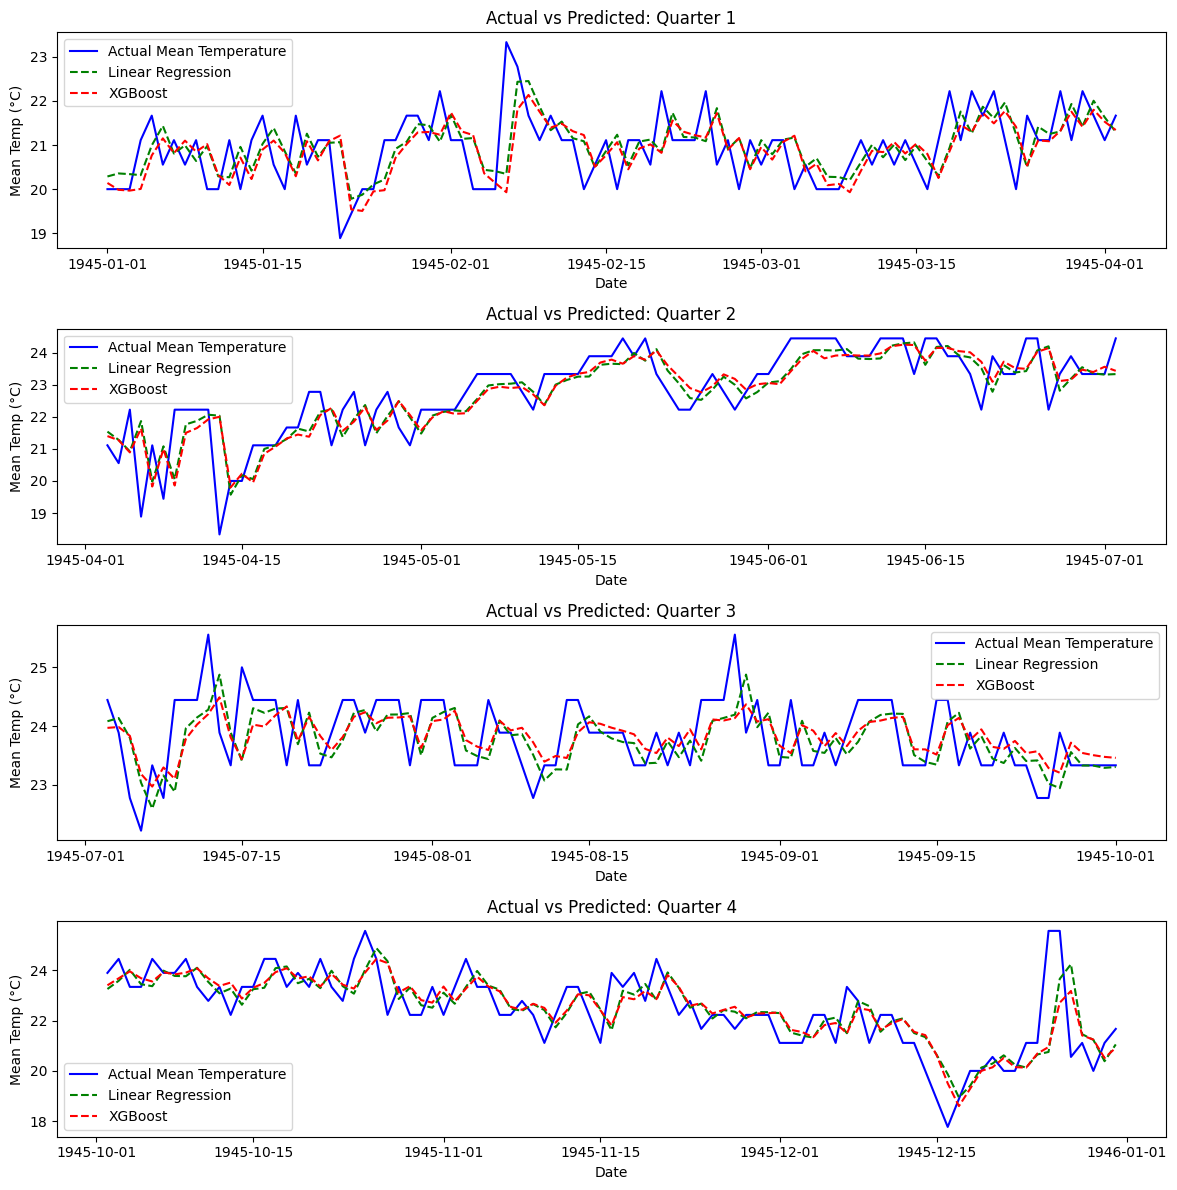

In [97]:
best_model = best_xgb
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_xgb = best_model.predict(X_test)
y_pred_linear = linreg.predict(X_test)

# Draw yearly plot
plt.figure(figsize=(12, 7))
plt.plot(test_df['TargetDate'], y_test, label='Actual Mean Temperature', color='b')
plt.plot(test_df['TargetDate'], y_pred_linear, label='Linear Regression', color='g', linestyle='--')
plt.plot(test_df['TargetDate'], y_pred_xgb, label='XGBoost', color='r', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.title('Actual vs Predicted Mean Temperature (Test Set) with XGBoost and Linear on 10days rolling window')
plt.legend()
plt.tight_layout()
plt.show()

# Draw 4 quarter
test_df['TargetDate'] = pd.to_datetime(test_df['TargetDate'])
quarters = pd.qcut(test_df['TargetDate'], q=4, labels=False)

plt.figure(figsize=(12, 12))

for i in range(4):
    plt.subplot(4, 1, i + 1)
    quarter_mask = (quarters == i)
    plt.plot(test_df.loc[quarter_mask, 'TargetDate'], y_test[quarter_mask], label='Actual Mean Temperature', color='b')
    plt.plot(test_df.loc[quarter_mask, 'TargetDate'], y_pred_linear[quarter_mask], label='Linear Regression', color='g', linestyle='--')
    plt.plot(test_df.loc[quarter_mask, 'TargetDate'], y_pred_xgb[quarter_mask], label='XGBoost', color='r', linestyle='--')

    plt.xlabel('Date')
    plt.ylabel('Mean Temp (°C)')
    plt.title(f'Actual vs Predicted: Quarter {i + 1}')
    plt.legend()
    plt.tight_layout()

plt.show()


*   Fianl graph comparison insights


As can be seen from the comparison line charts,
Hyperparameter optimization of XGBoost (using GridSearchCV) provides measurable but limited improvement compared to the default settings and linear regression.

While advanced machine learning models like XGBoost can slightly improve prediction accuracy, a well-tuned linear regression model is already able to capture most of the underlying structure of next-day temperature predictions in this dataset. Model selection should strike a balance between performance, interpretability, and computational efficiency, especially in real-world deployments.


